### NOTE
1) Using meta estimator and random forest
2) Import BaggingClasssifier and randomforestclassifier from sklearn.ensemble

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import make_moons

In [7]:
x,y = make_moons(n_samples=1000,noise=0.2)

TypeError: cannot unpack non-iterable function object

In [8]:
x

array([[ 0.98149777, -0.28462709],
       [ 0.49718495, -0.17957289],
       [-0.70194351,  0.13849683],
       ...,
       [ 0.71060123, -0.33479417],
       [ 0.93422268,  0.200814  ],
       [ 0.07045074, -0.0181207 ]])

In [9]:
y

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,

In [10]:
df = {'x1':x[:,0],"x2":x[:,1],"y":y}

In [11]:
df = pd.DataFrame(df)

In [12]:
df

,x1,x2,y
0,0.981498,-0.284627,0
1,0.497185,-0.179573,1
2,-0.701944,0.138497,0
3,1.816558,0.361852,1
4,0.137232,0.160080,1
...,...,...,...
995,-0.892994,0.816569,0
996,0.458077,0.879214,0
997,0.710601,-0.334794,1
998,0.934223,0.200814,0


<Axes: xlabel='x1', ylabel='x2'>

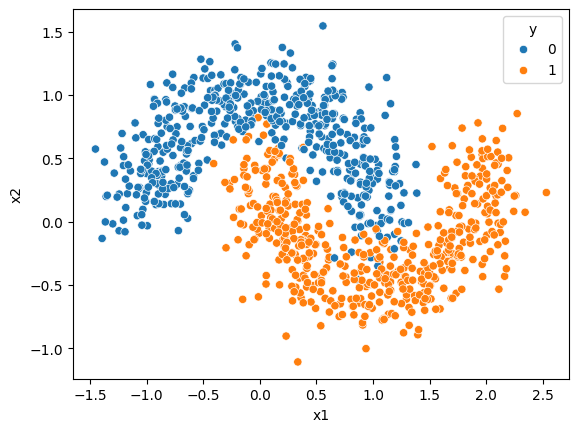

In [13]:
sns.scatterplot(x="x1",y="x2",hue="y",data=df)

In [14]:
from sklearn.model_selection import train_test_split

In [27]:
x_a = df.iloc[:,:-1]
y_a = df["y"]

In [28]:
x_a,y_a

(           x1        x2
 0    0.981498 -0.284627
 1    0.497185 -0.179573
 2   -0.701944  0.138497
 3    1.816558  0.361852
 4    0.137232  0.160080
 ..        ...       ...
 995 -0.892994  0.816569
 996  0.458077  0.879214
 997  0.710601 -0.334794
 998  0.934223  0.200814
 999  0.070451 -0.018121
 
 [1000 rows x 2 columns],
 0      0
 1      1
 2      0
 3      1
 4      1
       ..
 995    0
 996    0
 997    1
 998    0
 999    1
 Name: y, Length: 1000, dtype: int64)

In [29]:
y_a

0      0
1      1
2      0
3      1
4      1
      ..
995    0
996    0
997    1
998    0
999    1
Name: y, Length: 1000, dtype: int64

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,random_state=42,test_size=0.2)

In [31]:
x_train

,x1,x2
29,1.968377,0.410664
535,0.587575,0.560532
695,1.324423,-0.532620
557,0.102839,0.883162
836,1.107508,-0.450746
...,...,...
106,0.566159,0.577264
270,1.154785,-0.475602
860,1.060658,-0.279462
435,-0.044194,-0.137140


In [32]:
x_test

,x1,x2
521,-0.980664,0.459534
737,0.919686,-0.279307
740,0.481995,0.838572
660,1.669132,-0.143528
411,1.318121,-0.677237
...,...,...
408,0.429994,1.105216
332,1.319741,-0.818413
208,0.809952,0.081597
613,1.454538,-0.410575


In [33]:
y_train

29     1
535    0
695    1
557    0
836    1
      ..
106    0
270    1
860    1
435    1
102    0
Name: y, Length: 800, dtype: int64

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [1]:
bg = BaggingClassifier(estimator=SVC(),n_estimators=30)
bg.fit(x_train,y_train)

NameError: name 'BaggingClassifier' is not defined

In [40]:
sv = SVC()
sv.fit(x_train,y_train)

SVC()

In [41]:
sv.score(x_train,y_train),sv.score(x_test,y_test)

(0.98, 0.975)

In [36]:
bg.score(x_train,y_train),bg.score(x_test,y_test)

(0.98, 0.975)

In [42]:
# RANDOM FOREST 

In [43]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)


RandomForestClassifier(n_estimators=10)

In [44]:
rf.score(x_train,y_train),rf.score(x_test,y_test)

(1.0, 0.955)